In [27]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [28]:
# 读文件到df,显示出前10行
#== Your code
df = pd.read_csv('merged_movie_data.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."


In [29]:
# 打印出所有的列名
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast'],
      dtype='object')

2.Now we will define the regression and classification outcomes. Specifically, we will use the revenue column as the target for regression. For classification, we will construct an indicator of profitability for each movie.

(1)Create a new column in df called profitable, 
defined as 1 if the movie revenue is greater than the movie budget, and 0 otherwise.

Next, define and store the outcomes we will use for regression and classification.

(2)Define regression_target as 'revenue'.
Define classification_target as 'profitable'.

(1)在df中创建一个名为"profitable"的新列, 对于movie revenue大于movie budget的数据,profitable的值设置为1,其余的数据profitable设置为0.

(2)定义并保存如下结果,以便我们用来做回归和分类.
定义 regression_target 为 'revenue'.
定义classification_target 为 'profitable'.


In [30]:
# Your code
df['profitable'] = df.revenue > df.budget # True
df['profitable'] = df['profitable'].astype(int) # True --> 1

regression_target = 'revenue'
classification_target = 'profitable'

# For checking
df.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'profitable'],
      dtype='object')

For simplicity, we will proceed by analyzing only the rows without any missing data. 

In this exercise, we will remove rows with any infinite or missing values.

为例简化问题,我们只分析没有缺失值的行. 请除去那些含有无穷或缺失值的行.

In [31]:
# 可能用到的方法: df.replace()
# your code: 
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how="any")

# For checking
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,profitable
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",1


Many of the variables in our dataframe contain the names of genre, actors/actresses, and keywords. 

Let's add indicator columns for each genre.

Determine all the genres in the genre column. Make sure to use the strip() function on each genre to remove trailing characters.

Next, include each listed genre as a new column in the dataframe. 
Each element of these genre columns should be 1 if the movie belongs to that particular genre, and 0 otherwise.
(Keep in mind, a movie may belong to several genres at once.)
Call df[genres].head() to view your results.

我们的df中,许多变量包含genre(体裁)actors/actresses,和 keywords.让我们对没一种体裁增加指标列. 请确定genre列所有的体裁(genres). 保证运用strip()函数到每一个genre,以去除其后面的字符.

然后,把列出的每种体裁作为这个df的一个新的列. 
如果一部电影属于某个体裁,那么这一列的值就为1, 否则为0.
注意: 一部电影可以同时属于几个不同的体裁.
调用df[genres].head()查看结果.

In [32]:
# ==Your code
# 将genres转成列表
list_genres = df.genres.apply(lambda x: str(x).split(","))

genres = []
for row in list_genres:
    row = [genre.strip() for genre in row]
    for genre in row:
        # Your code 
        if genre not in genres:
            genres.append(genre)
     
# Series.str.contains : 
# Test if pattern or regex is contained within a string of a Series or Index.

# Return boolean Series or Index based on whether a given 
# pattern or regex is contained within a string of a Series or Index.            
for genre in genres:
    df[genre] = df['genres'].str.contains(genre).astype(int)

df[genres].head() # 只显示部分列,这里由索引列表由genres决定.
# 对比: df[]中可以传入一个列表作为索引对象.如下
# df[["Action", "Fantasy"]].head()
# 对比: df.genres.head()
# 增加的列数
len(genres)
df.columns
# For checking
df.head(1)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Comedy,Romance,Horror,Mystery,War,History,Music,Documentary,TV Movie,Foreign
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,0,0,0,0,0,0,0,0,0,0


5 .Some variables in the dataset are already numeric and perhaps useful for regression and classification. 

In this exercise, we will store the names of these variables for future use. 

We will also take a look at some of the continuous variables and outcomes by plotting each pair in a scatter plot. 

Finally, we will evaluate the skew of each variable.

(5) 这个数据集中的一些变量已经是数值型,它们可用于分类和回归. 
保存这些变量,以便后面分析.

对其中的连续变量(数值型变量)budget, popularity, revenue两两配对,做出散点图.

[可选] 做散点图时,你可能用到的方法pd.tools.potting.scatter_matrix(),
plt.tight_layout().

搜索并理解skew()方法的含义,然后估算每一个变量的偏度(skew). 打印出来.

['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'revenue', 'profitable']


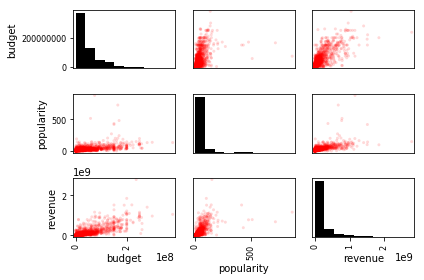

skew of  budget :  1.754872159281025
skew of  popularity :  7.968138736869573
skew of  runtime :  1.0598039846193392
skew of  vote_count :  2.461040753709467
skew of  vote_average :  -1.0800375233967405
skew of  revenue :  3.084680371302008
skew of  profitable :  -1.0810296751847972


In [33]:
# 题目给出的代码
continuous_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_covariates = continuous_covariates + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

print(outcomes_and_continuous_covariates)

axes = pd.plotting.scatter_matrix(df[plotting_variables], alpha = 0.15,color=(0,0,0),hist_kwds={"color":(0,0,0)},facecolor=(1,0,0))
plt.tight_layout()

# show the plot.
plt.show()

# determine the skew.
for x in outcomes_and_continuous_covariates:
    print("skew of ",x,": ",df[x].skew())

### 偏度 

偏度（skewness），是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。偏度(Skewness)亦称偏态、偏态系数。 

表征概率分布密度曲线相对于平均值不对称程度的特征数。直观看来就是密度函数曲线尾部的相对长度。 

定义上随机变量$X$的偏度是样本的三阶标准化矩： 

$\gamma_1 = E[(\frac{X-\mu}{\sigma})^3] = \frac{E[X^3]-3\mu\sigma^2 -\mu^3}{\sigma^3}$, $\sigma$是标准差, $E$表示期望算子.  


概率论和统计学中，偏度衡量实数随机变量概率分布的不对称性。

偏度的值可以为正，可以为负或者甚至是无法定义. 

在数量上，偏度为负（负偏态）就意味着在概率密度函数左侧的尾部比右侧的长，绝大多数的值（包括中位数在内）位于平均值的右侧.

偏度为正（正偏态）就意味着在概率密度函数右侧的尾部比左侧的长，绝大多数的值（但不一定包括中位数）位于平均值的左侧. 

偏度为零就表示数值相对均匀地分布在平均值的两侧，但不一定意味着其为对称分布.


6: 

变量budget, popularity, runtime, vote_count, and revenue 全都是右偏的. 
请转换这些变量,以消除这个右偏性.

具体做法: 应用np.log10()方法. 因为有些变量值精确地为0, 所以我们增加一个小的正值到每一个变量上来确保对数函数可以定义. 

(注意: $\log(0) = -\infty$)


In [34]:
# ==Your code
li = ["budget","popularity","runtime","vote_count","revenue"]
for x in li:
   df[x] = np.log10(df[x] + 1)

# checking
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Comedy,Romance,Horror,Mystery,War,History,Music,Documentary,TV Movie,Foreign
0,8.374748,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",2.180234,"Ingenious Film Partners, Twentieth Century Fox...",...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'profitable', 'Action', 'Adventure',
       'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation',
       'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'War',
       'History', 'Music', 'Documentary', 'TV Movie', 'Foreign'],
      dtype='object')

In [36]:
all_covariates = ['budget', 'popularity', 'runtime', 'vote_count',
                  'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 
                  'Animation', 'Family', 'Western', 'Comedy', 'Romance',
                  'Horror', 'Mystery', 'War', 'History', 'Music', 
                  'Documentary', 'TV Movie', 'Foreign']
print(len(all_covariates))
df.head(2)
all_col = ['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'profitable', 'Action', 'Adventure',
       'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation',
       'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'War',
       'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']
print(len(all_col))

25
43


## 项目第二部分

电影数据集: a database of 5000 movies catalogued by The Movie Database (TMDb). 

每部电影的可用信息是: 其预算(budget),收益(revenue), 等级评定(rating), 演员(actors and actresses)等. 
该项目中,我们利用这个数据集来决定-----是否关于一部电影的某些信息能预测电影的总收益(revenue). 我们也将试图预测是否一部电影的总收益(revenue)能否超过其预算(budget).

预备知识:

#### 协变量(1): 基本含义

covariate:  characteristics (excluding the actual treatment) of the participants in an experiment. 

If you collect data on characteristics before you run an experiment, you could use that data to see how your treatment affects different groups or populations. 
Or, you could use that data to control for the influence of any covariate.

协变量可能影响一项研究的结果.
Covariates may affect the outcome in a study.


例如,  你在进行一项试验,想看看玉米有多耐旱.
干旱的程度(级别)就是一种处理,但干旱程度却不是影响玉米表现的唯一因素. 玉米的尺寸就会影响其耐旱程度的一个因素,因此你应该将玉米的尺寸作为一个协变量.增加一个协变量到一个模型, 可以增加结果的准确度(accuracy).


协变量的另一个例子: (from Penn State): 假如你在对比男人和女人的工资以查看谁挣钱更多. 你需要控制的一个因子是: 人们离开大学时间越长,往往挣钱更多. 此例中,离开大学的时间便是一个协变量.


#### 协变量(2):协变量的引申含义


协变量是连续型变量.

在这样的场景下, 协变量总是连续的,总是一个控制变量, 且总是测量所得(observed)


#### 题目
我们将应用前面学习过的两个模型: 线性回归(逻辑回归)与随机森林. 我们利用它们来做回归预测和分类. 我们将运用这些方法来预测总收益. 我们用逻辑回归将电影分类,从而预测哪些电影可盈利,哪些电影不可盈利. 

首先,我们拟合回归和分类模型.


#### 1.

依次分别实例化 

LinearRegression(), 

LogisticRegression(), 

RandomForestRegressor(), 

和RandomForestClassifier() 对象为

linear_regression, 

logistic_regression,

forest_regression,

和forest_classifier.

对于随机森林模型, 指定参数 

max_depth=4,

random_state=0.

In [37]:
# 从`df`中定义所有的协变量(all_covariates)和目标(outcomes)
all_covariates = ['budget', 'popularity', 'runtime', 'vote_count',
                  'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 
                  'Animation', 'Family', 'Western', 'Comedy', 'Romance',
                  'Horror', 'Mystery', 'War', 'History', 'Music', 
                  'Documentary', 'TV Movie', 'Foreign']

regression_outcome = df[regression_target]
classification_outcome = df[classification_target]
# 假设: 此处的covariates的含义是:连续变量.
covariates = df[all_covariates]

# 实例化所有的回归模型和分类器
linear_regression = 
logistic_regression = 
forest_regression = 
forest_classifier = 

### 2. 
创建两个函数来评估模型的好坏,即计算模型的得分.  

对回归模型, 我们用关联(correlation)来表示得分.

对分类模型,我们用准确度(accuracy)来表示得分.

In [38]:
#回归
def correlation(estimator, X, y):
    predictions = estimator.fit(X, y).predict(X)
    return r2_score(y, predictions)
#分类    
def accuracy(estimator, X, y):
    #==Your code


### 3.
请对线性分类模型和随机森林分类模型做性能的交叉验证.

依次调用 cross_val_score()方法,

设置参数cv=10,以用10重交叉验证,设置 scoring=accuracy以利用前面定义的关联函数来作为评估标准. 

利用命令 plt.show() 做出每一个关于线性模型和随机森林回归的交叉验证fold的实际收入和预测收入的关联.


In [1]:
# 对线性分类模型和随机森林分类模型,计算交叉验证准确度(cross-validated accuracy)
# 参考cross_val_score()用法: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
logistic_regression_scores = 
forest_classification_scores = 

# 作图
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

# 显示图像


### 5.

在第3题,我们看到: 预测的收益只是稍微有效.预测一部电影的收益刚好为0是不现实的. 
下面我们将去除这些电影, 并重新运行我们的模型,以决定是否拟合出的模型的性能有所提高. 

本题中, 我们将对子数据集再次运行回归分析.

In [40]:
# 选出收益(revenue)大于0的电影,构成子数据集,保存为positive_revenue_df
positive_revenue_df = 

# Replace the dataframe in the following code, and run.

regression_outcome = positive_revenue_df[regression_target]
classification_outcome = positive_revenue_df[classification_target]
covariates = positive_revenue_df[all_covariates]

# Reinstantiate all regression models and classifiers.
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)

linear_regression_scores = 
forest_regression_scores =
logistic_regression_scores = 
forest_classification_scores = 

### 6.
计算交叉验证性能:
利用线性回归和随机森林回归模型,对具有正的收益的电影计算交叉验证性能.

依次调用 cross_val_score()方法,分别利用 linear_regression和 forest regression作为模型. 分别保存cross_val_score()的结果到linear_regression_scores 和 forest_regression_scores.

设置参数cv=10,以用10重交叉验证,设置 scoring=correlation以利用前面定义的关联函数来作为评估标准. 

利用命令 plt.show() 做出每一个关于线性模型和随机森林回归的交叉验证fold的实际收入和预测收入的关联.

考虑: 

()哪一个模型更好?

()对于预测电影的收益,哪一个变量最重要?


In [2]:
# Determine the cross-validated correlation for linear and random forest models.
linear_regression_scores = 
forest_regression_scores = 

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

# Show the plot.
plt.show()

# 打印出随机森林回归方法中每个协变量的重要性. 可能用到的方法: feature_importances_
forest_regression.fit(positive_revenue_df[all_covariates], regression_outcome)
# Your code

    
# 对于预测电影的收益,哪一个变量最重要?
# Your code

分析:
根据此关联图的值,可见:  对于收益为正的电影, 随机森林模型好,还是线性模型更好?


### 7.
对收益为正的电影,请对线性模型和随机森林分类模型计算交叉验证性能.

In [3]:
# 对线性回归模型和随机森林回归模型,计算交叉验证准确度(cross-validated accuracy)
logistic_regression_scores = 
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

# 作图
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

# 显示图像
plt.show()
# 打印出随机森林分类方法中每个协变量的重要性. 可能用到的方法: model.feature_importances_,  其中的model是你拟合出的随机森林分类器.
forest_classifier.fit(positive_revenue_df[all_covariates], classification_outcome)
# your code

    
# 列出对电影是否盈利影响最大的三个协变量.
# your code


分析: 
(1)根据交叉验证关联的度量(metric),随机森林模型与线性模型哪个表现得更好?

(2) 对于预测电影的盈利与否,哪三个因素最重要?

### 8. 
对于线性回归模型和随机森林回归模型,请计算交叉验证的性能(cross-validated performance).

In [4]:
#对线性模型和随机森林模型,计算交叉验证准确度(cross-validated accuracy).
linear_regression_scores = 
forest_regression_scores = 

# 作图
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

# 显示图像


根据交叉验证关联的度量(metric),随机森林模型与线性模型哪个表现得更好?

In [ ]:
[ 3,  2,  1,  0],
[ 2,  1,  0, -1],
[ 1,  0, -1, -2],
[ 0, -1, -2, -3]